# Introduction to Anomaly Detection in Time Series 

**Notes**

This is a Supporting Introductory Notebook for my Linked in Series in Anomaly Detection

**REFERENCE LINKS for Linked in Series on  Time Series**

- Anomaly Detection in Time Series -Part 1 Level Shift
https://www.linkedin.com/pulse/anomaly-detection-time-series-part-1-level-shift-dr-anish-utcic/


- Anomaly Detection Part 2 – Isolation Forest
https://www.linkedin.com/pulse/anomaly-detection-part-2-isolation-forest-roychowdhury-ph-d--qfyac/


- Anomaly Detection Part 3 – Local Outlier Factor
https://www.linkedin.com/pulse/anomaly-detection-part-3-local-outlier-factor-roychowdhury-ph-d--khshc/

- Anomaly Detection Part 4 - using Auto Encoders 
https://www.linkedin.com/posts/activity-7285011475323109376-oD3A?utm_source=share&utm_medium=member_desktop

## Structure of this Tutorial 

- **Section 1 : Background** 
  - What is Anomaly Detection 
  - Background on Time Series Anomalies 
  - Basic Univariate Outlier Detection - Box Plots 
  
  
- **Section 2: Other Methods to Detect outliers in Time Series Data**
  - Statistical Methods 
  - Change Point Detection 
  - Distance Based Methods 
  - Hybrid Methods 
  
- **Section 3 : Plot Based Demos**
  - Set 1 Plot Demos  with  Dummy Data 
     - Example 1 : Box Plot for unvariate outliers 
     - Example 2 : Z score method 
     - Example 3 : Using Mahalanobis Distance 
     - Example 4 : Cluster Based Outliers 

  - Set 2 Plot Demos  with  Synthetically generated data for  Business Context 
     - Example 5 : Context Based Outliers - Ice Creams Sales 
     - Example 6 : Level Shift : Customer Churn Rate Reduction
     - Example 7 : A Seasonal Time Series - Level Shift : Hotel Occupancy Rates 
     - Example 8 : Uptrending Time Series with Level Shift : E commerce Sales 
     - Example 9 : Level Shift with Rolling Mean - Stock Trading 

- **Section 4 :   Real World use case** - Stock Price Fluctuation Anomaly using Mahanalobis Distance for NVIDIA Stock 
 - **Appendix A** : Interquartile Range and Box Plots in Detail 
 - **Appendix B** : Understanding Z score in detail 
 - **Appendix C** : Understanding Mahalanobis Distance and its Applications in Anomaly Detection 
 - **Appendix D** : The Chi Square DIstribution - how its used for Mahalanobis method and setting the threshold 
 - **Appendix E** : Window Size Selection for Level Shift Detection

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2
from sklearn.covariance import EllipticEnvelope

# Section 1 :  Background

## What is Anomaly Detection

Anomaly detection is the process of identifying data points, patterns, or events that significantly deviate from the normal pattern within a dataset. These outliers typically represent rare or unexpected behaviours, making them critical in various domains such as fraud detection, system performance monitoring, and predictive maintenance. The primary goal of anomaly detection is to recognize unusual occurrences that may indicate potential risks, failures, or opportunities, enabling timely intervention or decision-making.

## Background on Time Series Anomalies 


### 1) Point Anomalies (Global Outliers):
A point anomaly occurs when a single data point deviates significantly from the rest of the data.

#### Example: 
In sensor data, a sudden spike in temperature could indicate a malfunction.
    
### 2) Contextual Anomalies (Seasonal or Context-Based):
A contextual anomaly occurs when a data point is anomalous within a specific context but may appear normal in another. This type often occurs in time series where seasonality or trends are present.

#### Example: 
A sudden drop in sales during a holiday season when sales are expected to rise.

### 3) Collective Anomalies:
A collective anomaly is when a sequence or a group of data points deviate from the expected pattern, though individual points may not appear anomalous.

#### Example:
A sensor's readings gradually deviate from the norm over time, indicating system degradation.

### 4) Level Shift Anomalies:**
A level shift occurs when the mean value of a time series changes abruptly, indicating an anomaly.

#### Example: 
A sudden change in electricity consumption after a policy update


## Basic Univariate Outlier Detection - Box Plots 


### Introduction
Box plots (also known as box-and-whisker plots) are powerful statistical visualization tools that provide a summary of a dataset's distribution. They are particularly useful for identifying outliers and comparing distributions across groups.

### Anatomy of a Box Plot
Reference - https://muse.union.edu/dvorakt/what-drives-the-length-of-whiskers-in-a-box-plot/



#### Core Components
1. **The Box**

   - The box represents the Interquartile Range (IQR)
   - Lower edge = First Quartile (Q1, 25th percentile)
   - Upper edge = Third Quartile (Q3, 75th percentile)
   - The line inside the box = Median (Q2, 50th percentile)
   - IQR = Q3 - Q1

2. **The Whiskers**
   - Extend from the box to show the rest of the distribution
   - Lower whisker: Q1 - 1.5 × IQR
   - Upper whisker: Q3 + 1.5 × IQR
   - Whiskers stop at the last data point within these bounds

3. **Outliers**
   - Points plotted individually beyond the whiskers
   - Any value below Q1 - 1.5 × IQR
   - Any value above Q3 + 1.5 × IQR



### Statistical Insights from Box Plots

### 1. Central Tendency
- **Median Position**: Shows skewness
  - Centered median → Symmetric distribution
  - Median closer to Q1 → Positive skew
  - Median closer to Q3 → Negative skew

### 2. Spread and Variability
- **Box Size**: Represents the spread of middle 50% of data
  - Larger box → More variability
  - Smaller box → Less variability
- **Whisker Length**: Shows spread of non-outlier data
  - Long whiskers → Data widely spread
  - Short whiskers → Data tightly clustered

### 3. Outlier Detection
- **Mild Outliers**: Between 1.5 × IQR and 3 × IQR from the box edges
- **Extreme Outliers**: More than 3 × IQR from the box edges

### Common Applications

1. **Quality Control**
   - Monitoring manufacturing processes
   - Identifying unusual measurements
   - Tracking process stability

2. **Data Cleaning**
   - Identifying suspicious values
   - Validating data entry
   - Screening for measurement errors

3. **Comparative Analysis**
   - Comparing distributions across groups
   - Analyzing treatment effects

### Advantages and Limitations

### Advantages
1. Simple visual summary of data distribution
2. Easy identification of outliers
3. Effective for comparing multiple datasets
4. Robust against non-normal distributions
5. Shows key percentiles and spread

### Limitations
1. Loss of detail about exact values
2. May obscure multimodal distributions
3. Small sample sizes can be misleading
4. No indication of sample size
5. Can oversimplify complex distributions
6. Handling Non Temporal Outliers but not necessarily directly applied to Time Series Anomalies

# Section 2: Other Methods to Detect outliers in Time Series Data 

### Statistical Methods

#### Z-Score Method

- **Description:** Measures how far a data point is from the mean in terms of standard deviations.

- **Steps:**

  - Calculate the mean (μ) and standard deviation (σ) of the data.
  - Compute the Z-score for each point: .
  - Flag points with Z-scores beyond a threshold (e.g., |Z| > 3) as anomalies.

#### Moving Average and Standard Deviation

- **Description:** Smoothens data to identify deviations over a sliding window.

- **Steps:**

   - Calculate the moving average and standard deviation for a fixed window size.
   - Flag points outside .

#### Deep Learning

- **Autoencoders:**

  - Learn a compressed representation of the data and flag points with high reconstruction error.
  - Suitable for high-dimensional time series.

- **Recurrent Neural Networks (RNNs):**

  - Models like LSTM can capture temporal dependencies and flag unexpected patterns.


### Change Point Detection

- **Description:** Identifies abrupt changes in the mean or variance of the data.


### Distance-Based Methods

- **Description:** Identifies anomalies by calculating distances between points.

- **Techniques:**
  - k-Nearest Neighbors (k-NN): Flags points with large distances from their neighbors.
  - Dynamic Time Warping (DTW): Measures similarity between time series to identify anomalies.
  - Mahalanobis Distance: Measures the distance of a point from the mean while considering correlations between variables. This method is particularly useful for identifying anomalies in multivariate time series data.

### Hybrid Methods

- Combine multiple approaches for robust detection.

- Example: Use clustering to preprocess data, followed by an autoencoder for anomaly detection

# Section 3: Code Based Demo Examples 

## Set 1:  Plot Demos  with  Dummy Data 

- Example 1 : Box Plot for unvariate outliers 
- Example 2 : Z score method 
- Example 3 : Using Mahalanobis Distance 
- Example 4:  Cluster Based Outliers 



###  Example 1: Box Plot - Univariate Outliers


This example demonstrates the simplest form of anomaly detection using univariate data. The box plot visualization helps students understand:

- The normal distribution of values (left plot) showing the median, quartiles, and whiskers representing the expected range of values

- How outliers appear as individual points beyond the whiskers (right plot)

- The impact of outliers on the overall distribution

#### Applications 

This type of anomaly detection is commonly used in quality control, sensor readings, or any single-measurement system where values should fall within an expected range.

In [11]:
# Basic Set Up 


# Set random seed for reproducibility
np.random.seed(42)

def create_figure():
    """Create a figure with two subplots side by side"""
    return plt.subplots(1, 2, figsize=(15, 6))

#### Custom Functions for Example 1 

In [9]:
# Example 1: Box Plot - Univariate Outliers
def generate_univariate_data(n_samples=100, n_outliers=5):
    """Generate univariate data with and without outliers"""
    normal_data = np.random.normal(loc=10, scale=2, size=n_samples)
    data_with_outliers = np.copy(normal_data)
    
    # Add outliers
    outlier_indices = np.random.choice(n_samples, n_outliers, replace=False)
    outliers = np.random.normal(loc=25, scale=3, size=n_outliers)
    data_with_outliers[outlier_indices] = outliers
    
    return normal_data, data_with_outliers

def plot_boxplots():
    """Create and plot boxplots for univariate data"""
    normal_data, data_with_outliers = generate_univariate_data()
    fig, (ax1, ax2) = create_figure()
    
    # Plot without outliers
    sns.boxplot(y=normal_data, ax=ax1)
    ax1.set_title('Normal Distribution\nNo Outliers')
    ax1.set_ylabel('Value')
    
    # Plot with outliers
    sns.boxplot(y=data_with_outliers, ax=ax2)
    ax2.set_title('Distribution with Outliers')
    ax2.set_ylabel('Value')
    
    plt.tight_layout()
    plt.show()

### Plots 

Example 1: Box Plot - Univariate Outliers


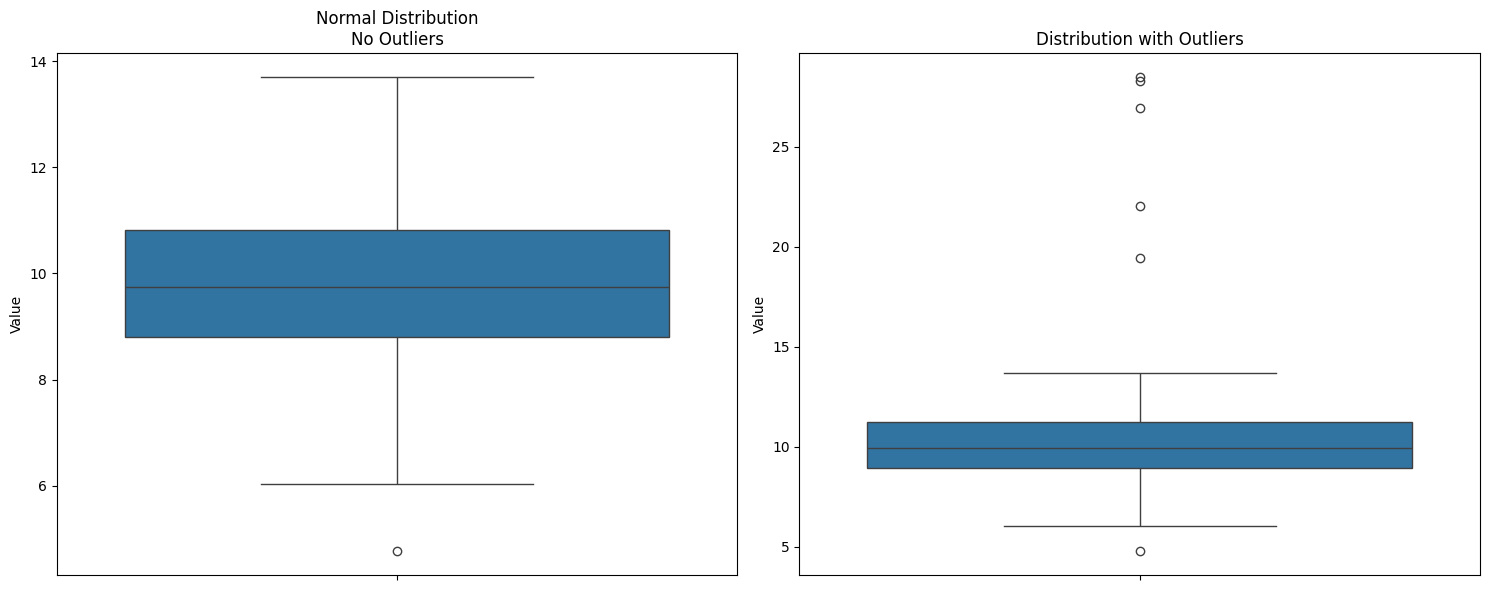

In [10]:
print("Example 1: Box Plot - Univariate Outliers")
plot_boxplots()

### Example 2: Z Score method 



**The provided example**

- Illustrates how data points that deviate significantly (e.g., an injected anomaly at index 50) are flagged based on their Z-scores. 

- The plot visually demonstrates the anomaly's deviation from the normal data distribution, making it easy to interpret and act upon.

**Applications:**

The Z-score method is widely used in monitoring financial transactions for fraud, detecting anomalies in sensor readings for industrial equipment, and identifying unusual patterns in website traffic. 

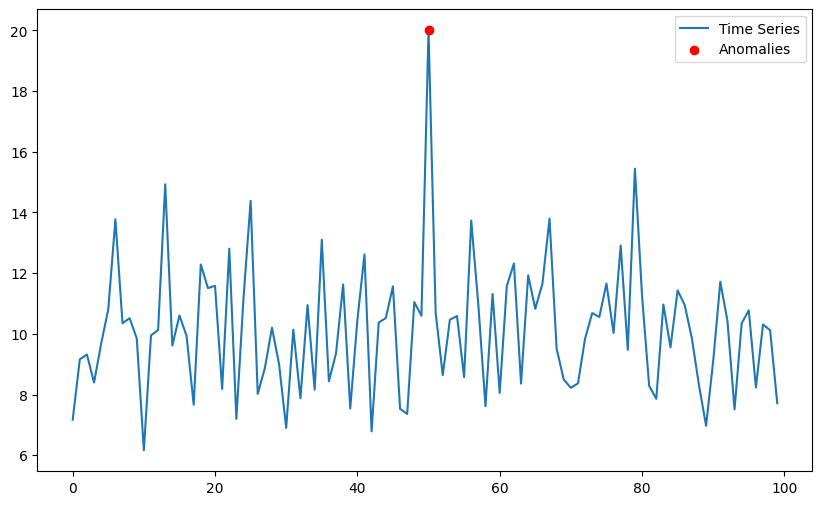

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic time series data
data = np.random.normal(loc=10, scale=2, size=100)
data[50] = 20  # Inject anomaly

# Compute Z-scores
mean = np.mean(data)
std_dev = np.std(data)
z_scores = (data - mean) / std_dev

# Flag anomalies
threshold = 3
anomalies = np.where(np.abs(z_scores) > threshold)[0]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(data, label="Time Series")
plt.scatter(anomalies, data[anomalies], color="red", label="Anomalies", zorder=5)
plt.legend()
plt.show()

### Example 3 - Using Mahalanobis Distance 

**Generate Time Series Data**

In [5]:
def generate_multivariate_timeseries(n_points=500, n_features=2):
    """
    Generate synthetic multivariate time series data
    with seasonal patterns and correlation between features
    """
    t = np.linspace(0, 10 * np.pi, n_points)
    
    # Generate correlated features
    feature1 = 3 * np.sin(t) + np.random.normal(0, 0.5, n_points)
    feature2 = 2 * np.sin(t + np.pi/4) + 0.5 * feature1 + np.random.normal(0, 0.5, n_points)
    
    # Combine features
    normal_data = np.column_stack((feature1, feature2))
    
    # Create anomalous data by adding outliers
    anomalous_data = normal_data.copy()
    
    # Add point anomalies
    n_anomalies = 25
    anomaly_indices = np.random.choice(n_points, n_anomalies, replace=False)
    
    # Generate anomalies that deviate from the normal correlation pattern
    anomalies = np.random.normal(loc=3, scale=2, size=(n_anomalies, n_features))
    anomalous_data[anomaly_indices] += anomalies
    
    return normal_data, anomalous_data, anomaly_indices

**Calcuate Mahalanobis Distance**

In [6]:
def calculate_mahalanobis_distances(data, robust=True):
    """
    Calculate Mahalanobis distances for each point in the dataset
    Using robust estimation of mean and covariance if specified
    """
    if robust:
        # Use EllipticEnvelope for robust estimation
        robust_cov = EllipticEnvelope(random_state=42, contamination=0.1, store_precision=True)
        robust_cov.fit(data)
        distances = np.sqrt(robust_cov.score_samples(data) * -2)  # Convert scores to distances
        mean = robust_cov.location_
        cov = robust_cov.covariance_
    else:
        # Use classical estimation
        mean = np.mean(data, axis=0)
        cov = np.cov(data.T)
        
        # Calculate Mahalanobis distances
        inv_covmat = np.linalg.inv(cov)
        distances = np.zeros(len(data))
        
        for i, x in enumerate(data):
            diff = x - mean
            distances[i] = np.sqrt(diff.dot(inv_covmat).dot(diff))
            
    return distances, mean, cov

**Detect Anomalies**

In [7]:
def detect_anomalies(distances, significance_level=0.01):
    """
    Detect anomalies using chi-square distribution threshold
    """
    # For Mahalanobis distance squared, use chi-square with p degrees of freedom
    threshold = np.sqrt(chi2.ppf(1 - significance_level, df=2))
    return distances > threshold, threshold

**Plot Results**

In [8]:

def plot_results(normal_data, anomalous_data, anomaly_indices, detected_anomalies, 
                distances, threshold, mean, cov, significance_level, title):
    """
    Create side-by-side plots showing normal and anomalous data
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot 1: Normal data
    scatter1 = ax1.scatter(normal_data[:, 0], normal_data[:, 1], 
                          c=distances, cmap='viridis')
    ax1.set_title('Normal Data\nColor indicates Mahalanobis distance')
    ax1.set_xlabel('Feature 1')
    ax1.set_ylabel('Feature 2')
    plt.colorbar(scatter1, ax=ax1)
    
    # Add confidence ellipse
    eigenvals, eigenvecs = np.linalg.eigh(cov)
    angle = np.degrees(np.arctan2(eigenvecs[1, 0], eigenvecs[0, 0]))
    ellip = plt.matplotlib.patches.Ellipse(
        xy=mean, width=2*threshold*np.sqrt(eigenvals[0]), 
        height=2*threshold*np.sqrt(eigenvals[1]), angle=angle,
        fill=False, color='red', label=f'{(1-significance_level)*100}% confidence ellipse'
    )
    ax1.add_patch(ellip)
    ax1.legend()
    
    # Plot 2: Anomalous data
    ax2.scatter(anomalous_data[:, 0], anomalous_data[:, 1], 
               c='blue', alpha=0.5, label='Normal points')
    
    # Highlight true anomalies
    ax2.scatter(anomalous_data[anomaly_indices, 0], 
                anomalous_data[anomaly_indices, 1],
                c='red', marker='x', s=100, label='True anomalies')
    
    # Highlight detected anomalies
    detected_indices = np.where(detected_anomalies)[0]
    ax2.scatter(anomalous_data[detected_indices, 0], 
                anomalous_data[detected_indices, 1],
                facecolors='none', edgecolors='green', s=200, 
                label='Detected anomalies')
    
    ax2.set_title('Anomaly Detection Results')
    ax2.set_xlabel('Feature 1')
    ax2.set_ylabel('Feature 2')
    ax2.legend()
    
    plt.suptitle(title, y=1.05)
    plt.tight_layout()
    plt.show()

#### Execute Example 

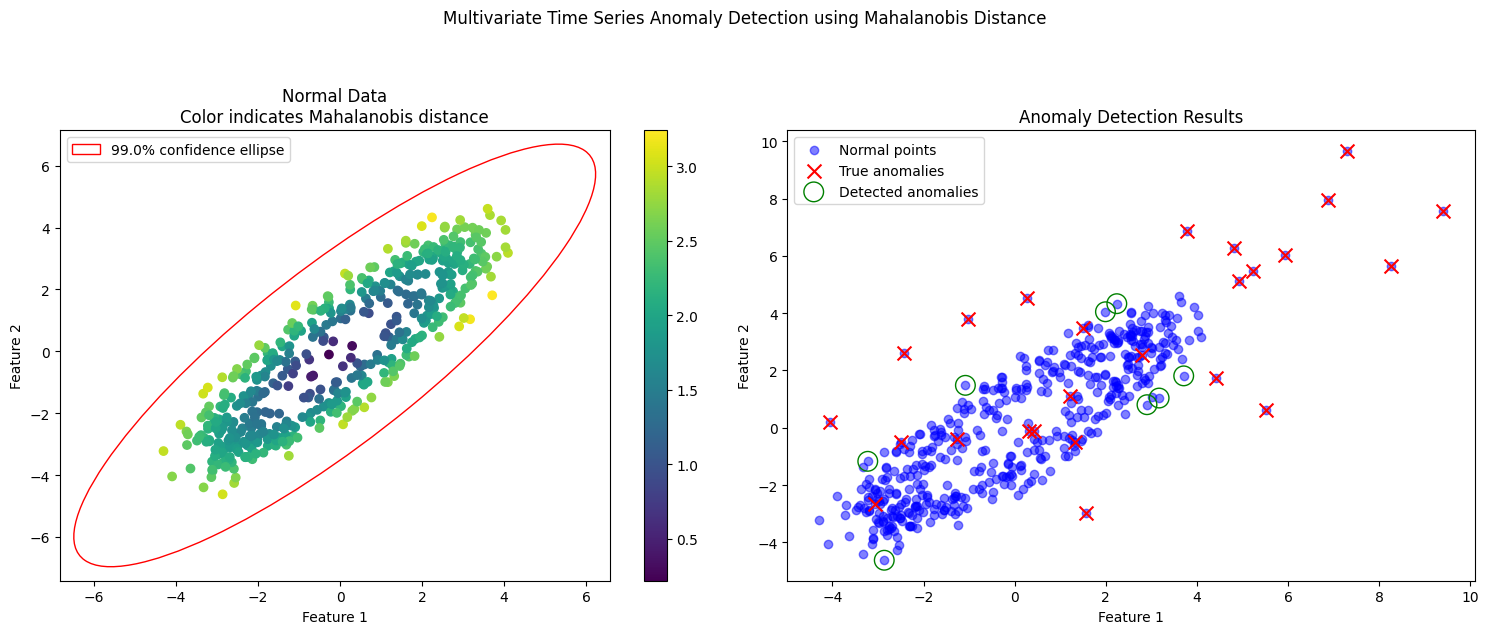


Performance Metrics:
Precision: 0.000
Recall: 0.000
F1-Score: 0.000


In [9]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
normal_data, anomalous_data, anomaly_indices = generate_multivariate_timeseries()

# Calculate Mahalanobis distances using robust estimation
distances, mean, cov = calculate_mahalanobis_distances(normal_data, robust=True)

# Detect anomalies
significance_level = 0.01
detected_anomalies, threshold = detect_anomalies(distances, significance_level)

# Plot results
plot_results(normal_data, anomalous_data, anomaly_indices, detected_anomalies, 
            distances, threshold, mean, cov, significance_level,
            'Multivariate Time Series Anomaly Detection using Mahalanobis Distance')

# Print performance metrics
detected_indices = np.where(detected_anomalies)[0]
true_positives = len(set(detected_indices) & set(anomaly_indices))
false_positives = len(detected_indices) - true_positives
false_negatives = len(anomaly_indices) - true_positives

precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print("\nPerformance Metrics:")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1_score:.3f}")

### Example 4: Cluster based Outliers

This example demonstrates density-based anomaly detection, where outliers are identified based on their isolation from natural clusters in the data. 

**The plots show:**

- Normal clustering patterns representing typical customer segments (left plot)
- Outliers that don't belong to any natural cluster (right plot, red X's)

This approach is valuable for:

Customer segmentation analysis
Network intrusion detection
Image processing where pixels should form natural clusters

In [12]:
# Example 4: Cluster-based Outliers
def generate_cluster_data(n_samples=300, n_outliers=15):
    """Generate clustered data with outliers"""
    # Generate normal clustered data
    X, _ = make_blobs(n_samples=n_samples, centers=3, cluster_std=1.0)
    normal_data = StandardScaler().fit_transform(X)
    
    # Create copy and add outliers
    data_with_outliers = np.copy(normal_data)
    
    # Generate outliers in sparse regions
    outliers = np.random.uniform(low=-4, high=4, size=(n_outliers, 2))
    data_with_outliers = np.vstack([data_with_outliers, outliers])
    
    return normal_data, data_with_outliers, n_outliers

def plot_cluster_outliers():
    """Plot cluster-based outliers"""
    normal_data, data_with_outliers, n_outliers = generate_cluster_data()
    fig, (ax1, ax2) = create_figure()
    
    # Plot without outliers
    ax1.scatter(normal_data[:, 0], normal_data[:, 1], c='blue', label='Normal Data')
    ax1.set_title('Customer Segmentation\nNormal Clusters')
    ax1.set_xlabel('Feature 1 (Normalized Spending)')
    ax1.set_ylabel('Feature 2 (Normalized Frequency)')
    ax1.legend()
    
    # Plot with outliers
    normal_points = data_with_outliers[:-n_outliers]
    outliers = data_with_outliers[-n_outliers:]
    
    ax2.scatter(normal_points[:, 0], normal_points[:, 1], c='blue', label='Normal Data')
    ax2.scatter(outliers[:, 0], outliers[:, 1], c='red', marker='x', s=100, label='Outliers')
    ax2.set_title('Customer Segmentation\nWith Anomalous Customers')
    ax2.set_xlabel('Feature 1 (Normalized Spending)')
    ax2.set_ylabel('Feature 2 (Normalized Frequency)')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()


Example 4: Cluster-based Outliers


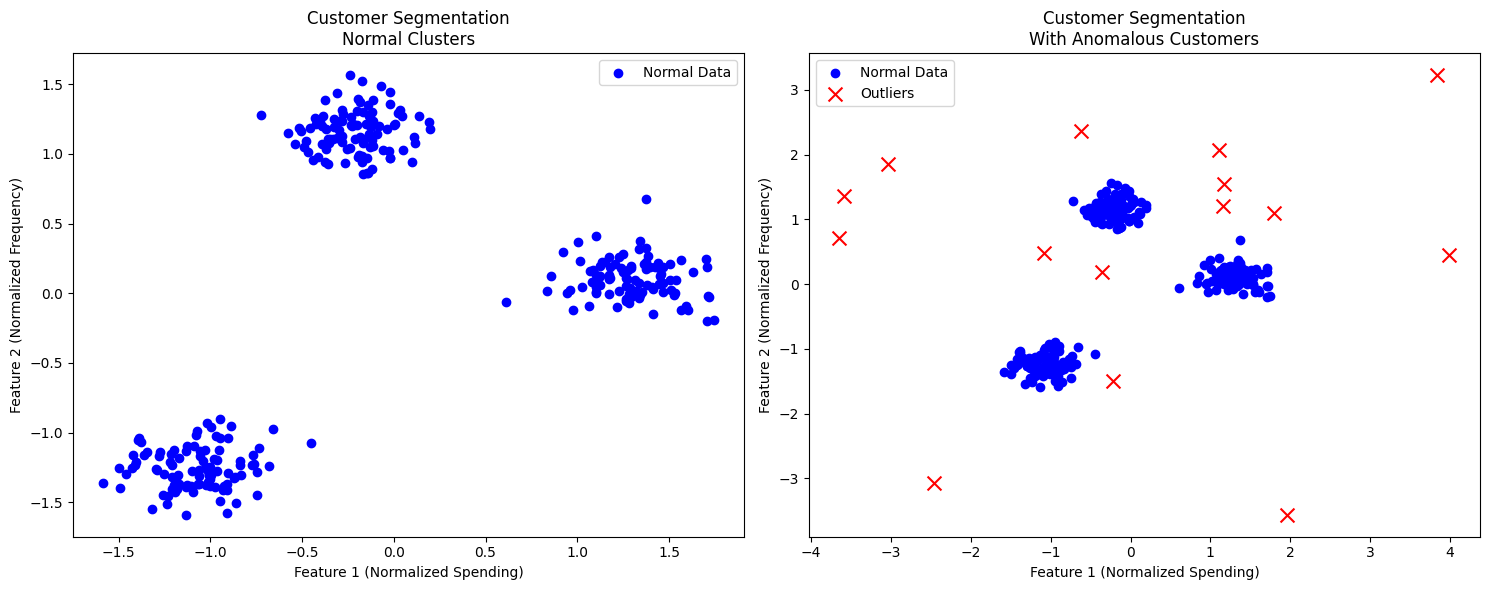

In [13]:
print("\nExample 4: Cluster-based Outliers")
plot_cluster_outliers()  

## Set 2 Plot Demos  with  Synthetically generated data for  Business Context 

- Example 5 : Context Based Outliers - Ice Creams Sales 
- Example 6 : Level Shift : Customer Churn Rate Reduction
- Example 7 : A Seasonal Time Series - Level Shift : Hotel Occupancy Rates 
- Example 8 : Uptrending Time Series with Level Shift : E commerce Sales 
- Example 9 : Level Shift with Rolling Mean - Stock Trading 


### Example 5 : Context-Based Outliers - Ice Cream Sales 

This example demonstrates contextual anomalies in seasonal ice cream sales data.

**The visualization shows:**

- Normal seasonal ice cream sales pattern with peak in summer months (left plot)
- Anomalous high sales during winter months that deviate from expected seasonal behavior (right plot, red X's)


**This type of analysis is particularly valuable in:**

- Retail seasonality monitoring (detecting unusual sales patterns)
- Climate data analysis (identifying weather anomalies within seasons)
- Tourism patterns (spotting unexpected visitor spikes in off-peak periods)
- Supply chain optimization (flagging unusual inventory demands in specific seasons)

The key insight is that these data points are considered anomalous not because of their absolute values, but because they occur during winter when such high sales are unexpected for ice cream products.

#### Define custom functions

In [33]:


def create_figure():
    return plt.subplots(1, 2, figsize=(12, 5))

def generate_seasonal_sales(n_samples=365, n_outliers=10):
    """Generate seasonal ice cream sales data with contextual outliers"""
    # Generate days throughout the year
    days = np.linspace(0, 365, n_samples)
    
    # Create seasonal pattern (higher sales in summer, lower in winter)
    seasonal_pattern = 1000 + 500 * np.sin(2 * np.pi * (days - 181) / 365)  # Peak at day 181 (summer)
    
    # Add some random noise
    sales = seasonal_pattern + np.random.normal(0, 50, n_samples)
    normal_data = np.column_stack((days, sales))
    
    # Create copy and add contextual outliers
    data_with_outliers = np.copy(normal_data)
    
    # Select days for outliers, focusing on winter months (days 0-90 and 270-365)
    winter_days = np.where((days < 90) | (days > 270))[0]
    outlier_indices = np.random.choice(winter_days, n_outliers, replace=False)
    
    # Add unusually high sales during winter (contextual anomaly)
    data_with_outliers[outlier_indices, 1] += np.random.normal(800, 100, n_outliers)
    
    return normal_data, data_with_outliers, outlier_indices

def plot_seasonal_outliers():
    """Plot seasonal ice cream sales with contextual outliers"""
    normal_data, data_with_outliers, outlier_indices = generate_seasonal_sales()
    fig, (ax1, ax2) = create_figure()
    
    # Plot without outliers
    ax1.scatter(normal_data[:, 0], normal_data[:, 1], c='blue', alpha=0.5, label='Normal Sales')
    ax1.set_title('Ice Cream Sales Throughout Year\nNormal Pattern')
    ax1.set_xlabel('Day of Year')
    ax1.set_ylabel('Daily Sales ($)')
    ax1.legend()
    
    # Plot with outliers
    normal_points = np.delete(data_with_outliers, outlier_indices, axis=0)
    outliers = data_with_outliers[outlier_indices]
    
    ax2.scatter(normal_points[:, 0], normal_points[:, 1], c='blue', alpha=0.5, label='Normal Sales')
    ax2.scatter(outliers[:, 0], outliers[:, 1], c='red', marker='x', s=100, 
                label='Anomalous Winter Sales')
    ax2.set_title('Ice Cream Sales Throughout Year\nWith Winter Anomalies')
    ax2.set_xlabel('Day of Year')
    ax2.set_ylabel('Daily Sales ($)')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()


    

#### Plot context based outliers 


Example 3: Context-based Outliers


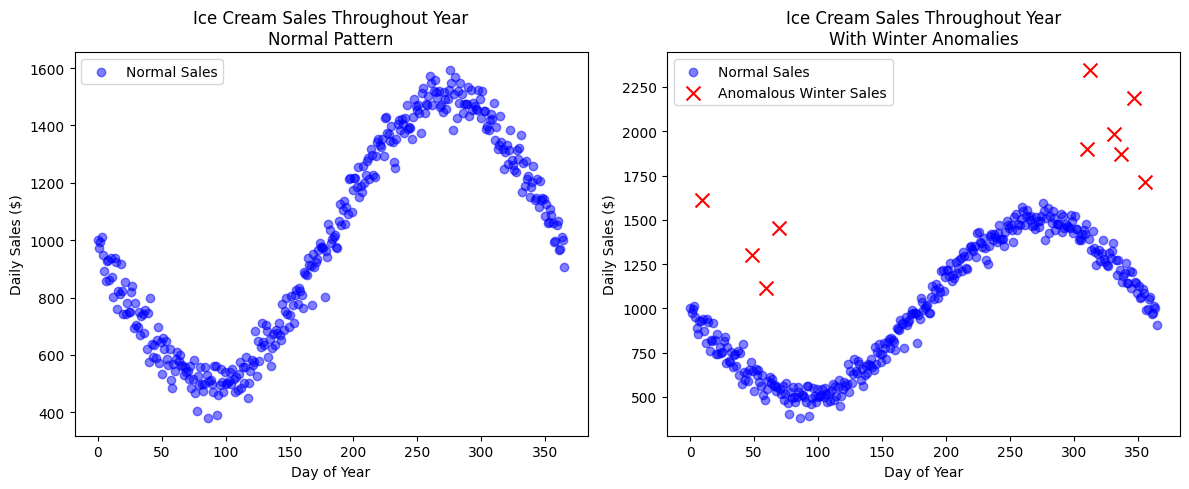

In [34]:
print("\nExample 3: Context-based Outliers")
plot_seasonal_outliers()

### Example 6 -  Level Shift : Customer Churn Rate Reduction



#### Model Description

Let $C(t)$ represent the customer churn rate at time $t$. The model parameters are:

* Base churn rate: $C_b = 5.0\%$
* Random variation: $\epsilon \sim \mathcal{N}(0, \sigma)$ where $\sigma = 0.3$
* Intervention impact: $\Delta C = -1.5\%$

The time series can be modeled as:

Before intervention $(t < t_i)$:
$$ C(t) = C_b + \epsilon_t $$

After intervention $(t \geq t_i)$:
$$ C(t) = C_b + \Delta C + \epsilon_t $$

where:
* $t_i$ is the intervention time point
* $\epsilon_t$ represents the random variation at time $t$

#### Statistical Properties

The level shift can be characterized by:

1. **Mean Shift**:
   $$ \Delta \mu = E[C(t \geq t_i)] - E[C(t < t_i)] = \Delta C $$

2. **Hypothesis Test**:
   $$ H_0: \Delta \mu = 0 \quad \text{vs} \quad H_1: \Delta \mu < 0 $$

3. **Effect Size**:
   $$ d = \frac{|\Delta \mu|}{\sigma} $$

#### Business Context

This model represents a subscription-based streaming service's monthly customer churn rate over a 36-month period. The level shift occurs at month 18 when a new customer retention strategy was implemented, including:

1. Enhanced customer support system
2. Personalized content recommendations
3. Improved user interface
4. Loyalty rewards program

The intervention resulted in:
* Immediate reduction in baseline churn rate
* Sustained improvement in customer retention
* More stable month-to-month variations

#### Practical Implications

The reduction in churn rate from $\mu_1 = 5.0\%$ to $\mu_2 = 3.5\%$ represents:
* Annual customer retention improvement of approximately $(1-(1-0.035)^{12}) - (1-(1-0.05)^{12}) \approx 15\%$
* Increased customer lifetime value (CLV)
* Enhanced business sustainability
* Improved revenue predictability

This type of level shift analysis helps in:
1. Quantifying intervention effectiveness
2. Justifying investment in retention strategies
3. Setting realistic targets for future improvements
4. Understanding the stability of the improvement

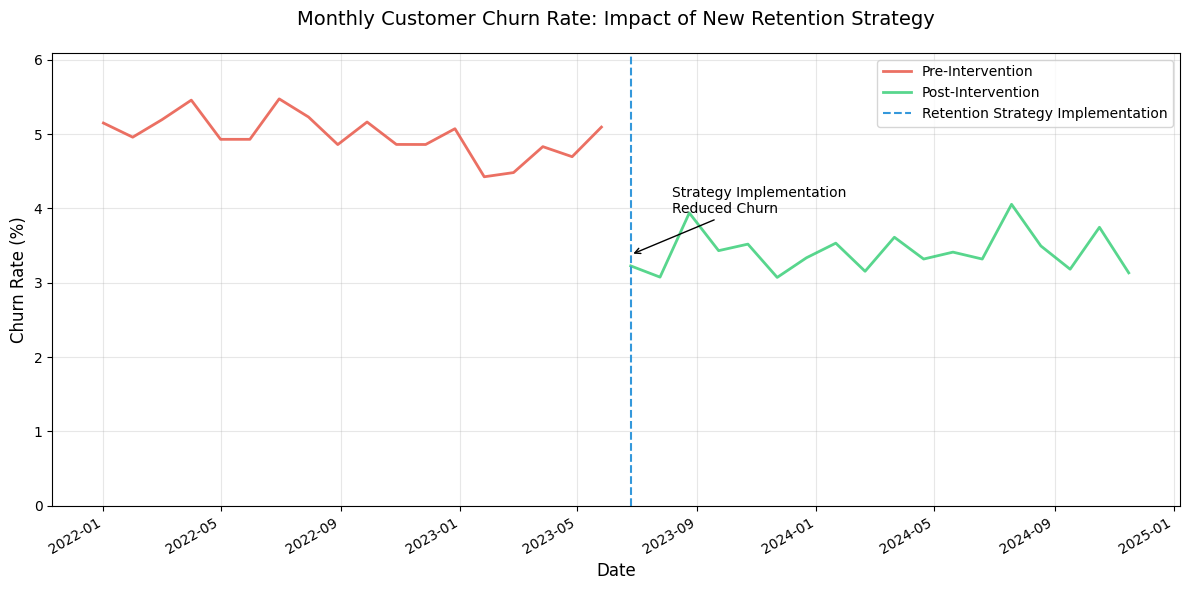


Business Impact Analysis:
Average Churn Rate Before Intervention: 4.98%
Average Churn Rate After Intervention: 3.42%
Absolute Churn Rate Reduction: 1.56%


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Set random seed for reproducibility
np.random.seed(42)

# Generate monthly data points (36 months)
months = np.arange(0, 36, 1)

# Parameters
base_churn_rate = 5.0     # Initial 5% monthly churn rate
noise_level = 0.3         # Random variation in churn
intervention_impact = -1.5 # 1.5% reduction in churn after intervention
intervention_point = 18    # Intervention at month 18

# Generate churn data before intervention
churn_before = (
    base_churn_rate + 
    np.random.normal(0, noise_level, len(months[:intervention_point]))
)

# Generate churn data after intervention
churn_after = (
    base_churn_rate +
    intervention_impact +  # Level shift due to intervention
    np.random.normal(0, noise_level, len(months[intervention_point:]))
)

# Combine the data series
total_churn = np.concatenate([churn_before, churn_after])

# Create date range for x-axis - Fix: Convert numpy.int64 to int
start_date = datetime(2022, 1, 1)
dates = [start_date + timedelta(days=int(x*30)) for x in months]

# Plotting
plt.figure(figsize=(12, 6))

# Plot churn data
plt.plot(dates[:intervention_point], churn_before, 
         label='Pre-Intervention', color='#E74C3C', alpha=0.8, linewidth=2)
plt.plot(dates[intervention_point:], churn_after, 
         label='Post-Intervention', color='#2ECC71', alpha=0.8, linewidth=2)

# Add vertical line for intervention
intervention_date = dates[intervention_point]
plt.axvline(x=intervention_date, color='#3498DB', linestyle='--', 
            label='Retention Strategy Implementation')

# Customize the plot
plt.title('Monthly Customer Churn Rate: Impact of New Retention Strategy', 
          fontsize=14, pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Format axes
plt.gcf().autofmt_xdate()
y_min, y_max = plt.ylim()
plt.ylim(0, y_max + 0.5)

# Add annotation
plt.annotate('Strategy Implementation\nReduced Churn', 
            xy=(intervention_date, np.mean(churn_after[:6])),
            xytext=(30, 30), textcoords='offset points',
            arrowprops=dict(arrowstyle='->'), fontsize=10)

plt.tight_layout()
plt.show()

# Calculate key metrics
pre_intervention_avg = np.mean(churn_before)
post_intervention_avg = np.mean(churn_after)
churn_reduction = pre_intervention_avg - post_intervention_avg

print(f"\nBusiness Impact Analysis:")
print(f"Average Churn Rate Before Intervention: {pre_intervention_avg:.2f}%")
print(f"Average Churn Rate After Intervention: {post_intervention_avg:.2f}%")
print(f"Absolute Churn Rate Reduction: {churn_reduction:.2f}%")

### Example 7 :  A Seasonal Time Series - Level Shift : Hotel Occupancy Rates 



### Model Specification

Let $O(t)$ represent the hotel occupancy rate at time $t$. The model includes these components:

* Base occupancy rate: $\mu = 65\%$
* Seasonal component: $S(t) = A\sin(2\pi t/12)$ where $A = 15$
* Random variation: $\epsilon_t \sim \mathcal{N}(0, \sigma)$ where $\sigma = 2$
* Level shift magnitude: $\Delta = 10\%$

The complete model can be expressed as:

Before intervention $(t < t_i)$:
$$ O(t) = \mu + S(t) + \epsilon_t $$

After intervention $(t \geq t_i)$:
$$ O(t) = \mu + \Delta + S(t) + \epsilon_t $$

#### Business Context

This model represents a luxury hotel's monthly occupancy rates from 2020 to 2024, with a significant change occurring after implementing a dynamic pricing strategy. The key components are:

1. **Seasonal Pattern**:
   * Peak seasons (summer): $\approx +15\%$ occupancy
   * Low seasons (winter): $\approx -15\%$ occupancy
   * 12-month cycle reflecting tourist seasons

2. **Level Shift Components**:
   * Implementation of dynamic pricing algorithm
   * Improved revenue management system
   * Enhanced booking flexibility
   * Strategic partnerships with travel platforms

3. **Business Improvements**:
   * Baseline occupancy increase of 10%
   * Maintained seasonal patterns
   * Consistent variance in random fluctuations

#### Statistical Properties

The seasonal pattern with level shift shows:

1. **Periodic Component**:
   $$ S(t) = A\sin(\omega t), \quad \omega = \frac{2\pi}{12} $$

2. **Mean Shift**:
   $$ E[O(t \geq t_i)] - E[O(t < t_i)] = \Delta $$

3. **Variance Stability**:
   $$ Var(O(t)) = \sigma^2 \quad \text{for all } t $$

#### Business Impact Analysis

The intervention results show:
1. Increased average occupancy by $\Delta = 10\%$
2. Preserved seasonal patterns important for planning
3. Maintained consistent variability in occupancy rates
4. Improved revenue predictability
5. Enhanced capacity utilization

This analysis helps in:
* Quantifying strategy effectiveness
* Planning staffing levels
* Optimizing pricing decisions
* Setting realistic occupancy targets
* Understanding seasonal demand patterns

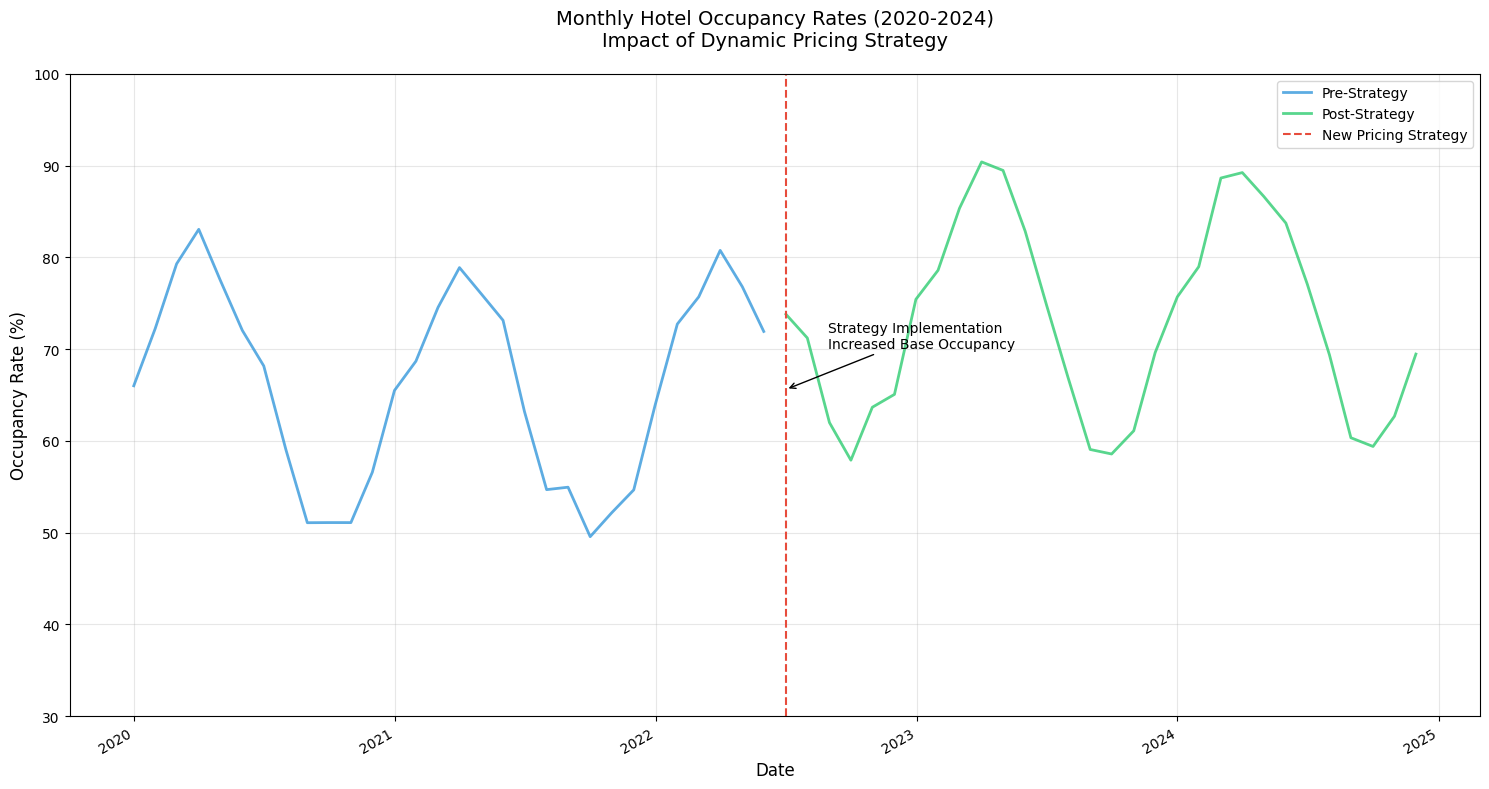


Business Impact Analysis:
Average Occupancy Before Strategy: 66.5%
Average Occupancy After Strategy: 72.9%
Average Occupancy Improvement: 6.4%


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Set random seed for reproducibility
np.random.seed(42)

# Generate monthly data points (60 months = 5 years)
months = np.arange(0, 60)

# Parameters
base_occupancy = 65  # Base occupancy rate (%)
seasonal_amplitude = 15  # Seasonal variation amplitude
level_shift = 10    # Increase after new pricing strategy
noise_level = 2     # Random variation
intervention_point = 30  # New strategy implementation (month 30)

# Create seasonal pattern (yearly cycle = 12 months)
seasonal_pattern = seasonal_amplitude * np.sin(2 * np.pi * months / 12)

# Generate occupancy data before intervention
occupancy_before = (
    base_occupancy + 
    seasonal_pattern[:intervention_point] +
    np.random.normal(0, noise_level, intervention_point)
)

# Generate occupancy data after intervention
occupancy_after = (
    base_occupancy +
    level_shift +
    seasonal_pattern[intervention_point:] +
    np.random.normal(0, noise_level, len(months[intervention_point:]))
)

# Create date range
start_date = datetime(2020, 1, 1)
dates = [start_date + timedelta(days=int(x*30.44)) for x in months]

# Plotting
plt.figure(figsize=(15, 8))

# Plot occupancy data
plt.plot(dates[:intervention_point], occupancy_before, 
         label='Pre-Strategy', color='#3498DB', alpha=0.8, linewidth=2)
plt.plot(dates[intervention_point:], occupancy_after, 
         label='Post-Strategy', color='#2ECC71', alpha=0.8, linewidth=2)

# Add vertical line for intervention
intervention_date = dates[intervention_point]
plt.axvline(x=intervention_date, color='#E74C3C', linestyle='--', 
            label='New Pricing Strategy')

# Customize the plot
plt.title('Monthly Hotel Occupancy Rates (2020-2024)\nImpact of Dynamic Pricing Strategy', 
          fontsize=14, pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Occupancy Rate (%)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Format axes
plt.gcf().autofmt_xdate()
plt.ylim(30, 100)

# Add annotation
plt.annotate('Strategy Implementation\nIncreased Base Occupancy', 
            xy=(intervention_date, np.mean(occupancy_after[:6])),
            xytext=(30, 30), textcoords='offset points',
            arrowprops=dict(arrowstyle='->'), fontsize=10)

plt.tight_layout()
plt.show()

# Calculate key metrics
pre_strategy_avg = np.mean(occupancy_before)
post_strategy_avg = np.mean(occupancy_after)
occupancy_improvement = post_strategy_avg - pre_strategy_avg

print(f"\nBusiness Impact Analysis:")
print(f"Average Occupancy Before Strategy: {pre_strategy_avg:.1f}%")
print(f"Average Occupancy After Strategy: {post_strategy_avg:.1f}%")
print(f"Average Occupancy Improvement: {occupancy_improvement:.1f}%")


### Example 8:  Uptrending Time Series with Level Shift : E commerce Sales 

**Business Context:**

The code simulates an e-commerce company's daily sales data, showing the impact of a major marketing campaign launch.

**Realistic Parameters:**



Let $S_b$ be the base daily sales, $r$ be the growth rate, $I_c$ be the campaign impact, and $\sigma$ be the daily variation factor. Then our model parameters are:

* Base daily sales: $S_b = \$1,000$
* Natural growth rate: $r = 0.10$ (10% per time unit)
* Campaign impact: $I_c = \$2,000$ (level shift)
* Random variations: $\epsilon \sim \mathcal{N}(0, \sigma \cdot S_b)$ where $\sigma = 0.005$

The time series can be modeled as:

Before campaign $(t < t_c)$:
$$ S(t) = S_b + rt + \epsilon_t $$

After campaign $(t \geq t_c)$:
$$ S(t) = S_b + rt + I_c + \epsilon_t $$

where:
* $t$ is the time index
* $t_c$ is the campaign start time
* $\epsilon_t$ represents the daily random variation at time $t$

The total expected increase in sales after the campaign is:
$$ \Delta S = I_c + r(t - t_c) $$
which combines both the immediate campaign impact and the continued growth trend.


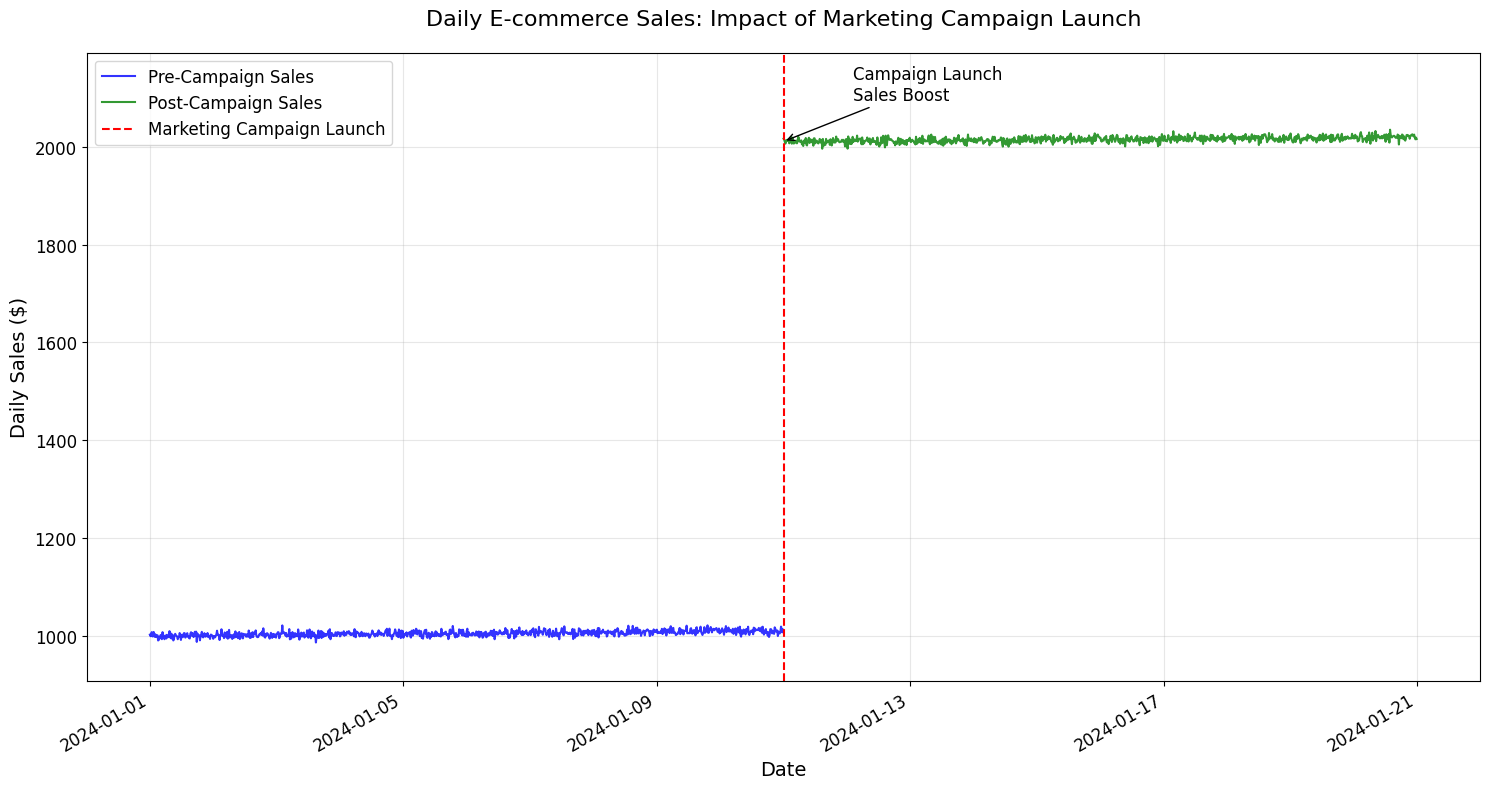


Business Impact Analysis:
Average Daily Sales Before Campaign: $1005.09
Average Daily Sales After Campaign: $2015.35
Percentage Increase in Sales: 100.5%


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Set random seed for reproducibility
np.random.seed(42)

# Generate time points (200 days with 0.1 day intervals for smooth visualization)
days = np.arange(0, 200, 0.1)

# Parameters for our simulation - adjusted for smaller gap
base_daily_sales = 1000     # Base daily sales in dollars
growth_rate = 0.1          # 10% growth rate
noise_level = 0.5          # Random variation in sales
campaign_impact = 1000     # Reduced from 2000 to 1000 for smaller gap

# Generate sales data before marketing campaign
sales_before_campaign = (
    base_daily_sales + 
    growth_rate * days[:1000] +
    np.random.normal(0, noise_level * base_daily_sales/100, len(days[:1000]))
)

# Generate sales data after marketing campaign launch
sales_after_campaign = (
    base_daily_sales +
    growth_rate * days[1000:] +
    campaign_impact +
    np.random.normal(0, noise_level * base_daily_sales/100, len(days[1000:]))
)

# Combine the data series
total_sales = np.concatenate([sales_before_campaign, sales_after_campaign])

# Create date range for x-axis
start_date = datetime(2024, 1, 1)
dates = [start_date + timedelta(days=x/10) for x in days]

# Create figure with adjusted size
plt.figure(figsize=(15, 8))

# Plot sales data
plt.plot(dates[:1000], sales_before_campaign, 
         label='Pre-Campaign Sales', color='blue', alpha=0.8)
plt.plot(dates[1000:], sales_after_campaign, 
         label='Post-Campaign Sales', color='green', alpha=0.8)

# Add vertical line for campaign launch
campaign_date = dates[1000]
plt.axvline(x=campaign_date, color='red', linestyle='--', 
            label='Marketing Campaign Launch')

# Customize the plot with larger font sizes
plt.title('Daily E-commerce Sales: Impact of Marketing Campaign Launch', 
          fontsize=16, pad=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Daily Sales ($)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Increase tick label size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Format date axis
plt.gcf().autofmt_xdate()

# Calculate appropriate y-axis limits
y_max = max(np.max(sales_after_campaign), np.max(sales_before_campaign))
y_min = min(np.min(sales_after_campaign), np.min(sales_before_campaign))
margin = (y_max - y_min) * 0.15  # 15% margin for annotations
plt.ylim(y_min - margin/2, y_max + margin)

# Add annotations with larger font
plt.annotate('Campaign Launch\nSales Boost', 
            xy=(campaign_date, np.mean(sales_after_campaign[:100])),
            xytext=(50, 30), textcoords='offset points',
            arrowprops=dict(arrowstyle='->'), 
            fontsize=12)

plt.tight_layout()
plt.show()

# Calculate and print key metrics with better formatting
pre_campaign_avg = np.mean(sales_before_campaign)
post_campaign_avg = np.mean(sales_after_campaign)
sales_increase = ((post_campaign_avg - pre_campaign_avg) / pre_campaign_avg) * 100

print("\nBusiness Impact Analysis:")
print(f"Average Daily Sales Before Campaign: ${pre_campaign_avg:.2f}")
print(f"Average Daily Sales After Campaign: ${post_campaign_avg:.2f}")
print(f"Percentage Increase in Sales: {sales_increase:.1f}%")

### Example 9 :  Level Shift Detection with Rolling Mean in Time Series :  Trading Volume Analysis


### Mathematical Framework

Let $V(t)$ represent the trading volume at time $t$. The model components are:

#### 1. Base Model
$$ V(t) = \mu + \epsilon_t + L(t) $$

where:
* $\mu$ is the base trading volume
* $\epsilon_t \sim \mathcal{N}(0, \sigma^2)$ is the random variation
* $L(t)$ is the level shift component

#### 2. Moving Average
For a window size $w$, the moving average $M(t)$ is:

$$ M(t) = \frac{1}{w}\sum_{i=0}^{w-1} V(t-i) $$

#### 3. Anomaly Detection Bounds
$$ B_{upper}(t) = M(t) + 2\sigma_w(t) $$
$$ B_{lower}(t) = M(t) - 2\sigma_w(t) $$

where $\sigma_w(t)$ is the rolling standard deviation:

$$ \sigma_w(t) = \sqrt{\frac{1}{w}\sum_{i=0}^{w-1} (V(t-i) - M(t))^2} $$

### Business Context

This analysis monitors stock trading volume to detect significant changes and anomalies. Key components include:

1. **Base Parameters**:
   * Daily trading volume ($\mu = 1,000,000$ shares)
   * Random variation ($\sigma = 100,000$ shares)
   * Level shift magnitude ($\Delta = 500,000$ shares)

2. **Moving Average Window**:
   * 20-day trading window
   * Approximates one trading month
   * Smooths daily fluctuations

3. **Anomaly Detection**:
   * ±2σ threshold for normal trading range
   * Captures 95% of expected variation
   * Flags unusual trading activity

### Event Analysis

The level shift at $t=100$ represents:

1. **Market Events**:
   * Company earnings announcement
   * Market structure change
   * Institutional investor activity

2. **Volume Characteristics**:
   * Sustained increase in trading activity
   * New baseline volume level
   * Maintained volatility pattern

### Statistical Properties

1. **Pre-Event Distribution**:
   $$ V(t) \sim \mathcal{N}(\mu, \sigma^2) \quad \text{for } t < t_e $$

2. **Post-Event Distribution**:
   $$ V(t) \sim \mathcal{N}(\mu + \Delta, \sigma^2) \quad \text{for } t \geq t_e $$

3. **Moving Average Properties**:
   * Lag of $(w-1)/2$ periods
   * Variance reduction by factor of $w$
   * Smoothing of short-term fluctuations

### Business Applications

This analysis supports:
1. Trading strategy development
2. Risk management
3. Market microstructure analysis
4. Regulatory compliance monitoring
5. Trading algorithm optimization

The combination of moving averages and anomaly bounds provides a robust framework for:
* Detecting unusual trading patterns
* Identifying structural market changes
* Monitoring trading activity
* Supporting trading decisions

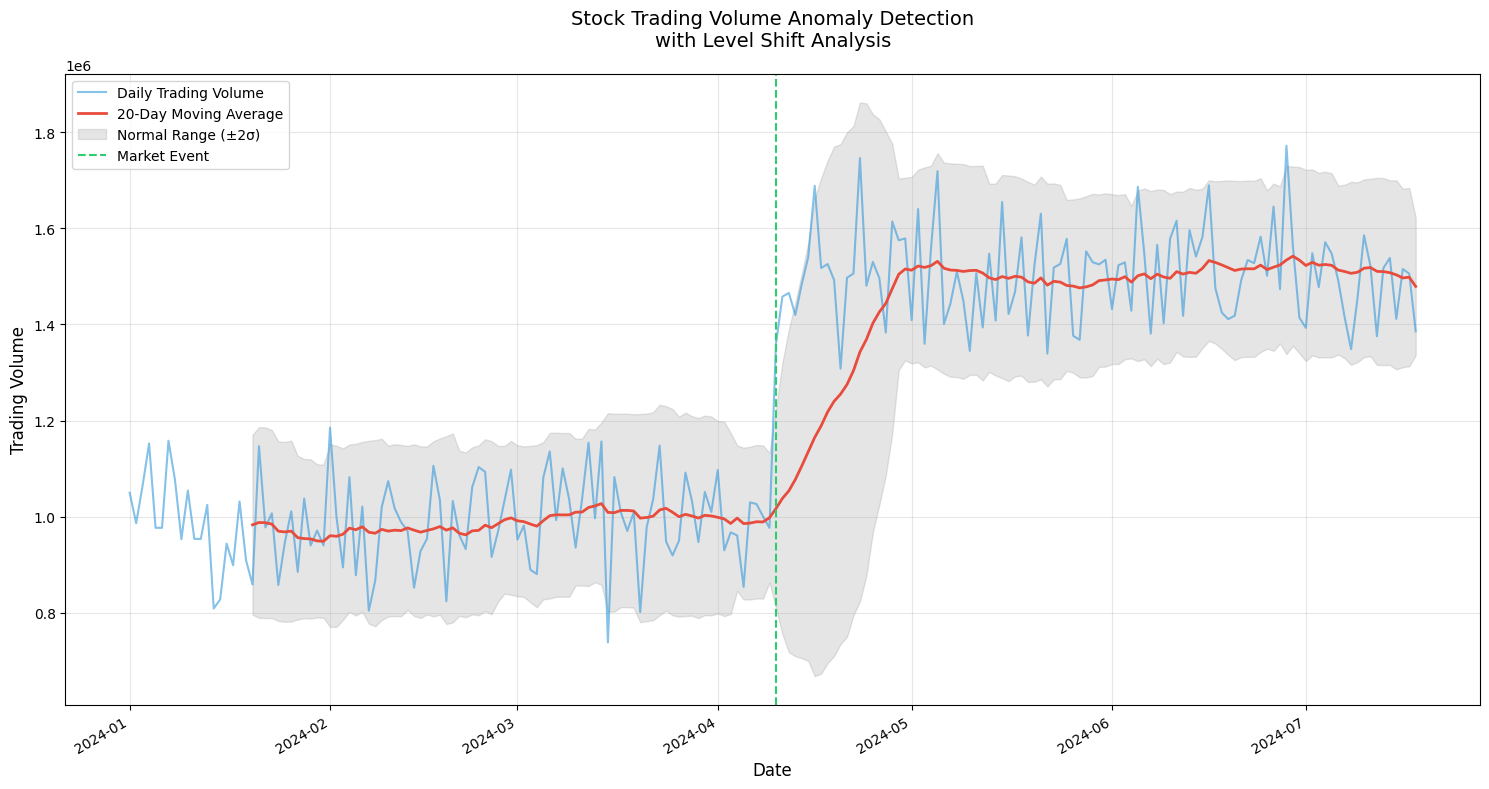


Trading Volume Analysis:
Pre-Event Average Volume: 989,615
Post-Event Average Volume: 1,502,230
Percentage Increase: 51.8%


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime, timedelta

# Set random seed for reproducibility
np.random.seed(42)

# Generate daily trading volume data
n_days = 200
base_volume = 1000000  # Base trading volume
noise_level = 100000   # Random variation in volume
shift_magnitude = 500000  # Volume increase after event
window_size = 20  # Moving average window (20 trading days)

# Generate time points
dates = [datetime(2024, 1, 1) + timedelta(days=x) for x in range(n_days)]
trading_volume = np.random.normal(loc=base_volume, scale=noise_level, size=n_days)

# Introduce level shift at t=100 (market event)
trading_volume[100:] += shift_magnitude

# Calculate rolling mean
rolling_mean = np.convolve(trading_volume, 
                          np.ones(window_size)/window_size, 
                          mode='valid')

# Calculate rolling standard deviation for anomaly detection
rolling_std = np.array([np.std(trading_volume[i:i+window_size]) 
                       for i in range(len(trading_volume)-window_size+1)])

# Define anomaly thresholds (2 standard deviations)
upper_bound = rolling_mean + 2*rolling_std
lower_bound = rolling_mean - 2*rolling_std

# Plot the results
plt.figure(figsize=(15, 8))

# Plot original volume
plt.plot(dates, trading_volume, label="Daily Trading Volume", 
         color='#3498DB', alpha=0.6)

# Plot rolling mean
plt.plot(dates[window_size-1:], rolling_mean, 
         label="20-Day Moving Average", 
         color='#E74C3C', linewidth=2)

# Plot anomaly bounds
plt.fill_between(dates[window_size-1:], 
                 upper_bound, lower_bound, 
                 color='gray', alpha=0.2, 
                 label='Normal Range (±2σ)')

# Add event line
plt.axvline(x=dates[100], color='#2ECC71', linestyle='--', 
            label="Market Event")

plt.title("Stock Trading Volume Anomaly Detection\nwith Level Shift Analysis", 
          fontsize=14, pad=20)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Trading Volume", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()

# Print analysis
pre_event_avg = np.mean(trading_volume[:100])
post_event_avg = np.mean(trading_volume[100:])
volume_increase = (post_event_avg - pre_event_avg) / pre_event_avg * 100

print(f"\nTrading Volume Analysis:")
print(f"Pre-Event Average Volume: {pre_event_avg:,.0f}")
print(f"Post-Event Average Volume: {post_event_avg:,.0f}")
print(f"Percentage Increase: {volume_increase:.1f}%")


# Section 4 :   Real World use case - Stock Price Fluctuation Anomaly using Mahanalobis Distance for NVIDIA Stock 

### Imports and Installs 

In [11]:
# Install required libraries if not already installed
# !pip install yfinance matplotlib numpy scipy
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2

### Custom Functions 

**Get Stock Data**

In [16]:
def get_stock_data(ticker, days, price_column='Close'):
    """
    Fetch stock data from Yahoo Finance.
    
    Parameters:
    ticker: str - Stock ticker symbol
    days: int - Number of days of historical data to fetch
    price_column: str - Which price column to use ('Open', 'High', 'Low', 'Close', 'Adj Close')
    
    Returns:
    pandas Series - Price data for the specified period
    """
    end_date = pd.Timestamp.today()
    start_date = end_date - pd.Timedelta(days=days)
    
    # Fetch data
    data = yf.download(ticker, start=start_date, end=end_date)
    if data.empty:
        raise ValueError(f"No data fetched for {ticker}. Check the ticker symbol or date range.")
    
    # Extract specified price column
    prices = data[price_column].dropna()
    if prices.empty:
        raise ValueError(f"{price_column} price data is empty.")
    
    return prices

**Create Lagged Features**

In [17]:
def create_lagged_features(series, window_size):
    """
    Create lagged features from a time series.
    
    Parameters:
    series: pandas Series - The original time series
    window_size: int - Number of lags to create
    
    Returns:
    pandas DataFrame with columns ordered from most recent to oldest lag
    e.g., for window_size=3:
    t0 (current), t-1 (1 day ago), t-2 (2 days ago)
    """
    # Create list of shifted series in reverse order (from oldest to newest lag)
    lagged_series = [series.shift(i) for i in range(window_size-1, -1, -1)]
    
    # Combine all series into a DataFrame
    lagged_df = pd.concat(lagged_series, axis=1).dropna()
    
    # Name columns to clearly indicate the time relationship
    # t0 is current time, t-1 is one period ago, etc.
    lagged_df.columns = [f't-{i}' if i > 0 else 't0' for i in range(window_size-1, -1, -1)]
    
    return lagged_df

**Detect Anomalies**

In [26]:
def detect_anomalies(ticker="NVDA", days=30, window_size=5, confidence_level=0.80, price_column='Close'):
    """
    Detect anomalies in stock price data using Mahalanobis distance.
    
    Parameters:
    ticker: str - Stock ticker symbol
    days: int - Number of days of historical data to analyze
    window_size: int - Size of the rolling window for lag features
    confidence_level: float - Confidence level for anomaly threshold
    price_column: str - Which price column to use
    """
    # Step 1: Fetch Stock Data
    try:
        prices = get_stock_data(ticker, days, price_column)
    except Exception as e:
        print(f"Error fetching stock data: {e}")
        return None
        
    # Step 2: Create Lagged Features
    # This creates a DataFrame where each row contains 'window_size' consecutive prices
    # Example for window_size=3:
    # t0 (current price), t-1 (yesterday's price), t-2 (price from 2 days ago)
    lagged_data = create_lagged_features(prices, window_size)
    
    if lagged_data.empty:
        raise ValueError("Insufficient data for the specified window size.")
        
    # Step 3: Calculate Mahalanobis Distance
    # Compute covariance matrix and its inverse
    cov_matrix = np.cov(lagged_data.values, rowvar=False)
    try:
        inv_cov_matrix = np.linalg.inv(cov_matrix)
    except np.linalg.LinAlgError:
        raise ValueError("Covariance matrix is singular. Try increasing the data range or reducing window size.")
        
    # Compute mean vector
    mean_vector = np.mean(lagged_data.values, axis=0)
    
    # Calculate Mahalanobis distance for each point
    mahalanobis_distances = []
    for i in range(len(lagged_data)):
        dist = mahalanobis(lagged_data.iloc[i].values, mean_vector, inv_cov_matrix)
        mahalanobis_distances.append(dist)
    
    # Convert distances to pandas Series
    mahalanobis_distances = pd.Series(mahalanobis_distances, index=lagged_data.index)
    
    # Step 4: Identify Anomalies
    # Use chi-squared distribution to set threshold
    threshold = chi2.ppf(confidence_level, df=window_size)
    anomalies = mahalanobis_distances > threshold
    
    # Step 5: Visualize Results
    plt.figure(figsize=(14, 7))
    
    # Plot stock prices
    plt.plot(prices, label=f'{ticker} {price_column} Prices', color='blue', alpha=0.7)
    
    # Highlight anomalies
    anomaly_indices = anomalies[anomalies].index
    anomaly_values = prices.loc[anomaly_indices]
    plt.scatter(anomaly_indices, anomaly_values, color='red', 
               label=f'Anomalies (>{confidence_level*100}% confidence)', 
               zorder=5, s=100)
    
    plt.title(f'{ticker} Stock Price Anomaly Detection\nusing Mahalanobis Distance')
    plt.xlabel('Date')
    plt.ylabel(f'{price_column} Price ($)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Return the results for further analysis if needed
    return {
        'prices': prices,
        'lagged_data': lagged_data,
        'mahalanobis_distances': mahalanobis_distances,
        'anomalies': anomalies,
        'threshold': threshold
    }

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Tesla stock data shape: (247, 1)


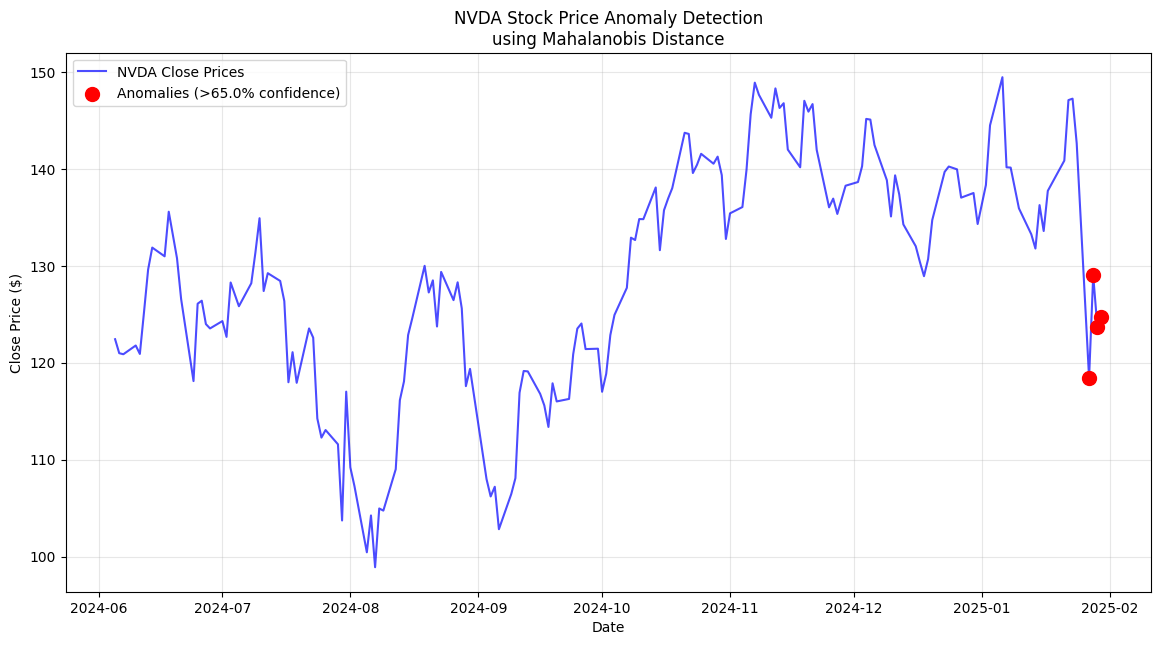


Analysis Results:
Number of anomalies found: 4
Threshold value: 5.57


In [31]:
# Example usage
if __name__ == "__main__":
    # Get stock data only
    tesla_data = get_stock_data("TSLA", days=360)
    print("Tesla stock data shape:", tesla_data.shape)
    
    # Full anomaly detection
    nvidia_results = detect_anomalies(
        ticker="NVDA",
        days=240,
        window_size=5,
        confidence_level=0.65,
        price_column='Close'
    )
    
    if nvidia_results:
        print("\nAnalysis Results:")
        print(f"Number of anomalies found: {nvidia_results['anomalies'].sum()}")
        print(f"Threshold value: {nvidia_results['threshold']:.2f}")

# Appendix A :  Interquartile Range and Box Plots in Detail 




https://en.wikipedia.org/wiki/Exploratory_data_analysis

### Definition of IQR

The **Interquartile Range (IQR)** is a statistical measure that represents the spread of the middle 50% of a dataset. It is defined as:

$$ IQR = Q_3 - Q_1 $$

where:

* $Q_1$ (First Quartile): The 25th percentile (lower quartile) of the data
* $Q_3$ (Third Quartile): The 75th percentile (upper quartile) of the data

### Why Is the Bulk of Data Found Within This Range?

#### Captures Central Distribution

Since the IQR focuses on the middle 50% of the data, it excludes extreme values and provides a robust measure of data variability.

#### Resistant to Outliers

Unlike the mean and standard deviation, which are sensitive to extreme values, the IQR is **not influenced by outliers** and provides a more **reliable representation** of data dispersion.

#### Statistical Distribution Properties

* In a **normal distribution**, approximately **50% of the data falls within the IQR**
* In **skewed distributions**, the IQR still contains the core of the data, though it might be asymmetrically distributed
* In **real-world datasets**, most data points are concentrated around the median, making the IQR a natural boundary for defining **expected variation**

#### Using IQR for Outlier Detection

The **Tukey's Rule** uses the IQR to define outliers:

$$ \text{Lower Bound} = Q_1 - 1.5 \times IQR $$
$$ \text{Upper Bound} = Q_3 + 1.5 \times IQR $$

Any data points beyond these bounds are considered potential **outliers**.

### Applications of IQR

* **Data Cleaning**: Identifying and handling anomalies in datasets
* **Descriptive Statistics**: Summarizing data variability without being affected by extreme values
* **Machine Learning**: Feature engineering and preprocessing for robust models
* **Finance & Economics**: Measuring stock price variability and income distributions

### Conclusion

The **IQR** is crucial for understanding data spread while maintaining robustness against extreme values, making it widely used in statistical analysis and anomaly detection.

# Appendix B :  Understanding Z score in Detail 



### What is a Z-Score?

A **Z-score** (also called a standard score) measures how many standard deviations away from the mean a data point is. The formula is:

$$ Z = \frac{x - \mu}{\sigma} $$

where:
* $x$ is the data point
* $\mu$ is the population mean
* $\sigma$ is the population standard deviation

### Properties of Z-Scores

* The mean of Z-scores is always $0$
* The standard deviation of Z-scores is always $1$
* Z-scores are dimensionless
* Approximately:
    * 68% of Z-scores fall between $-1$ and $+1$
    * 95% fall between $-2$ and $+2$
    * 99.7% fall between $-3$ and $+3$

### Computing Z-Scores: Step-by-Step Process

#### Step 1: Calculate the Mean ($\mu$)
For a dataset with $n$ values:

$$ \mu = \frac{1}{n}\sum_{i=1}^n x_i $$

#### Step 2: Calculate the Standard Deviation ($\sigma$)

$$ \sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n (x_i - \mu)^2} $$

#### Step 3: Apply the Z-Score Formula
For each data point $x_i$:

$$ Z_i = \frac{x_i - \mu}{\sigma} $$

### Sample Calculation Example

Given the dataset: [82, 85, 89, 91, 93]

1. Calculate mean:
$$ \mu = \frac{82 + 85 + 89 + 91 + 93}{5} = 88 $$

2. Calculate standard deviation:
$$ \sigma = \sqrt{\frac{(82-88)^2 + (85-88)^2 + (89-88)^2 + (91-88)^2 + (93-88)^2}{5}} = 4.32 $$

3. Calculate Z-score for 91:
$$ Z = \frac{91 - 88}{4.32} = 0.69 $$

### Interpreting Z-Scores

* $Z = 0$: The value equals the mean
* $Z > 0$: The value is above the mean
* $Z < 0$: The value is below the mean
* $|Z| = 1$: The value is one standard deviation from the mean
* $|Z| = 2$: The value is two standard deviations from the mean

### Applications of Z-Scores

1. **Standardization**: Converting datasets to a common scale
2. **Outlier Detection**: Values with $|Z| > 3$ are often considered outliers
3. **Comparison**: Comparing scores from different distributions
4. **Probability**: Finding percentiles using the standard normal distribution

### In Python Code

```python
import numpy as np

def calculate_zscore(x, data):
    mean = np.mean(data)
    std = np.std(data, ddof=0)  # ddof=0 for population standard deviation
    z_score = (x - mean) / std
    return z_score
```

### Important Notes

1. **Population vs. Sample**:
   * For population: Use $\sigma = \sqrt{\frac{1}{n}\sum(x_i - \mu)^2}$
   * For sample: Use $s = \sqrt{\frac{1}{n-1}\sum(x_i - \bar{x})^2}$

2. **Assumptions**:
   * Z-scores are most meaningful for approximately normal distributions
   * They may be less informative for highly skewed distributions

3. **Limitations**:
   * Sensitive to outliers
   * Assumes data is normally distributed
   * Not robust for small sample sizes

# Appendix C :  Understanding Mahanalbis Distance and its Applications in Anomaly Detection 



### 1. **What is Mahalanobis Distance?**

The Mahalanobis distance measures how far a point $\mathbf{x}$ is from a distribution with mean $\mathbf{\mu} $  and The covariance matrix $\mathbf{\Sigma}$. Unlike Euclidean distance, it considers the variance and correlation of the data, making it more robust for multivariate data.

#### Formula:
The Mahalanobis distance $D_M$ between a point $\mathbf{x}$ and a distribution is given by:

$$
\begin{aligned}
D_M(\mathbf{x}) &= \sqrt{(\mathbf{x} - \mathbf{\mu})^T \mathbf{\Sigma}^{-1} (\mathbf{x} - \mathbf{\mu})} \\
&= \sqrt{d^T \mathbf{\Sigma}^{-1} d} \quad \text{where } d = (\mathbf{x} - \mathbf{\mu})
\end{aligned}
$$

Where:
- $\mathbf{x}$: A data point (vector) in $\mathbb{R}^n$
- $\mathbf{\mu}$: The mean vector of the distribution
- $\mathbf{\Sigma}$: The covariance matrix of the distribution
- $\mathbf{\Sigma}^{-1}$: The inverse of the covariance matrix
- $T$: Denotes the transpose of a vector or matrix

### 2. **Why Use Mahalanobis Distance for Anomaly Detection?**

In time series data, anomalies are data points that deviate significantly from the expected behavior. The Mahalanobis distance is ideal for detecting such anomalies because:
1. It accounts for the correlation between variables (e.g., multiple features in time series).
2. It scales the data, so variables with larger variances do not dominate the distance calculation.
3. It provides a probabilistic interpretation of how "unusual" a data point is.

---

### 3. **Steps to Use Mahalanobis Distance for Anomaly Detection**

#### Step 1: Preprocess the Time Series Data
- Ensure the time series data is clean and normalized.
- If the data has multiple features, organize it into a matrix $\mathbf{X}$, where each row represents a time step and each column represents a feature.

#### Step 2: Compute the Mean and Covariance Matrix
- Compute the mean vector $\mathbf{\mu}$ of the data:
 $$
 \mathbf{\mu} = \frac{1}{N} \sum_{i=1}^N \mathbf{x}_i
 $$
 Where $N$ is the number of data points.
- Compute the covariance matrix $\mathbf{\Sigma}$:
 $$
 \mathbf{\Sigma} = \frac{1}{N-1} \sum_{i=1}^N (\mathbf{x}_i - \mathbf{\mu})(\mathbf{x}_i - \mathbf{\mu})^T
 $$

#### Step 3: Compute the Mahalanobis Distance for Each Data Point
For each data point $\mathbf{x}_i$, compute the Mahalanobis distance:
$$
D_M(\mathbf{x}_i) = \sqrt{(\mathbf{x}_i - \mathbf{\mu})^T \mathbf{\Sigma}^{-1} (\mathbf{x}_i - \mathbf{\mu})}
$$

#### Step 4: Set a Threshold for Anomaly Detection
- Determine a threshold $\tau$ for the Mahalanobis distance. Data points with $D_M(\mathbf{x}_i) > \tau$ are considered anomalies.
- The threshold can be chosen based on statistical properties (e.g., percentiles of the Chi-squared distribution) or domain knowledge.

#### Step 5: Detect Anomalies
- Compare the Mahalanobis distance of each data point to the threshold $\tau$.
- Flag data points with $D_M(\mathbf{x}_i) > \tau$ as anomalies.

### 4. **Mathematical Intuition**

#### Covariance Matrix
The covariance matrix $\mathbf{\Sigma}$ captures the relationships between variables. Its inverse $\mathbf{\Sigma}^{-1}$ scales the distance calculation to account for these relationships.

#### Chi-Squared Distribution
Under the assumption that the data follows a multivariate normal distribution, the squared Mahalanobis distance $D_M^2$ follows a Chi-squared distribution with $n$ degrees of freedom (where $n$ is the number of features):
$$
D_M^2(\mathbf{x}) \sim \chi^2_n
$$
This property allows us to set probabilistic thresholds for anomaly detection.

---

### 5. **Example: Anomaly Detection in Time Series Data**

#### Dataset
Suppose we have a time series dataset with two features:
$$
\mathbf{X} = \begin{bmatrix}
x_{11} & x_{12} \\
x_{21} & x_{22} \\
\vdots & \vdots \\
x_{N1} & x_{N2}
\end{bmatrix}
$$

#### Steps:
1. Compute the mean vector $\mathbf{\mu}$ and covariance matrix $\mathbf{\Sigma}$.
2. For each data point $\mathbf{x}_i$, compute $D_M(\mathbf{x}_i)$.
3. Set a threshold $\tau$ (e.g., the 95th percentile of the Chi-squared distribution).
4. Flag data points with $D_M(\mathbf{x}_i) > \tau$ as anomalies.



# Appendix D : The Chi Square DIstribution - how its used for Mahalanobis method and setting the threshold 

### **Why Use the Chi-Squared Distribution?**
The squared Mahalanobis distance $D_M^2(\mathbf{x})$ follows a **Chi-squared distribution** with $n$ degrees of freedom (where $n$ is the number of features in your data). This is because:
$$
D_M^2(\mathbf{x}) = (\mathbf{x} - \mathbf{\mu})^T \mathbf{\Sigma}^{-1} (\mathbf{x} - \mathbf{\mu}) \sim \chi^2_n
$$
This relationship allows us to use the properties of the Chi-squared distribution to set a threshold for anomaly detection.



### **Key Properties of the Chi-Squared Distribution**
1. **Degrees of Freedom**:
  - The degrees of freedom $n$ correspond to the number of features in the data.
  - For example, if your data has 2 features, the squared Mahalanobis distance follows $\chi^2_2$.
2. **Probabilistic Interpretation**:
  - The Chi-squared distribution provides a probabilistic framework for determining how "unusual" a data point is.
  - For a given significance level $\alpha$ (e.g., 0.05 for 95% confidence), you can compute the threshold $\tau$ such that:
    $$
    P(D_M^2(\mathbf{x}) \leq \tau) = 1 - \alpha
    $$
    This means that $100(1-\alpha)\%$ of the data points under normal conditions will have a squared Mahalanobis distance less than or equal to $\tau$.
3. **Threshold Calculation**:
  - The threshold $\tau$ is computed using the **percent-point function (PPF)** of the Chi-squared distribution:
    $$
    \tau = \chi^2_n(1-\alpha)
    $$
    Where:
    - $\chi^2_n$ is the Chi-squared distribution with $n$ degrees of freedom.
    - $\alpha$ is the significance level (e.g., 0.05 for 95% confidence).
    - $1-\alpha$ is the confidence level (e.g., 0.95 or 95%)





### Why is a Threshold Needed?

The Mahalanobis distance measures how far a point is from the mean of a multivariate distribution. A threshold is necessary to:

* **Distinguish anomalies** from normal data points
* **Control false positives and false negatives** in anomaly detection
* **Define a quantitative boundary** beyond which points are considered anomalous

### Threshold Calculation Using Chi-Square Distribution

The Mahalanobis distance for a data point $x_i$ in a dataset with mean $\mu$ and covariance matrix $S$ is given by:

$$ MD_i = \sqrt{(x_i - \mu)^T S^{-1} (x_i - \mu)} $$

Since Mahalanobis distances approximately follow a **Chi-Square** ($\chi^2$) **distribution** with degrees of freedom equal to the number of features ($p$), we define the threshold as:

$$ MD_i^2 \leq \chi^2_{p, \alpha} $$

where:
* $p$ is the number of dimensions (features)
* $\alpha$ is the **significance level**, which controls how extreme a value must be to be considered an anomaly
* $\chi^2_{p, \alpha}$ is the critical value of the Chi-Square distribution at the desired confidence level

### Choosing the Right Confidence Level

The choice of the confidence level ($1 - \alpha$) affects anomaly detection:

* **Lower threshold** (e.g., 90% confidence, $\alpha = 0.10$) results in more anomalies detected, increasing false positives
* **Higher threshold** (e.g., 99% confidence, $\alpha = 0.01$) results in fewer anomalies detected, increasing false negatives
* A commonly used threshold is **95% confidence** ($\alpha = 0.05$)

For example, when $p = 2$, the 95% confidence threshold is:

$$ \chi^2_{2, 0.05} \approx 5.99 $$

This means any data point with $MD^2 > 5.99$ is flagged as an anomaly.

### Implementation in Python

The threshold can be computed using Python with `scipy.stats.chi2.ppf`:

```python
import numpy as np
import scipy.stats as stats
# Number of features (dimensions)
p = 2  
# Significance level (e.g., 95% confidence)
alpha = 0.05  
# Compute Chi-Square threshold
threshold = stats.chi2.ppf(1 - alpha, df=p)
print(f"Chi-Square threshold for {p} features at {100*(1-alpha)}% confidence: {threshold}")
```

### Conclusion

* The **Mahalanobis distance threshold** is derived from the Chi-Square distribution
* The **confidence level** ($1 - \alpha$) determines the strictness of anomaly detection
* A typical threshold is $\chi^2_{p, 0.05}$ for **95% confidence**
* Proper tuning of $\alpha$ ensures a balance between anomaly detection and false positives

This approach makes Mahalanobis distance-based anomaly detection highly effective in multivariate datasets.

# Appendix E : Window Size Selection for Level Shift Detection


#### Theoretical Guidelines

The choice of window size depends on several factors:

1. **General Rules of Thumb**:
   * Minimum window size: $w_{min} = 8$ to $12$ observations
   * Maximum window size: $w_{max} = \sqrt{n}$ where $n$ is total observations
   * Common choices: 20-30 observations for daily data

2. **CUSUM (Cumulative Sum) Method**:
   * Traditional approach uses window sizes of 8-15 observations
   * Reference: Page, E. S. (1954) "Continuous Inspection Schemes"

#### Academic References

Key research papers on window size selection:

1. **Statistical Process Control**:
   * Montgomery, D.C. (2009) suggests:
   $$ w_{optimal} \approx \frac{\ln(ARL_0)}{2\Delta^2} $$
   where:
   * $ARL_0$ is Average Run Length under control
   * $\Delta$ is the expected shift magnitude

2. **EWMA (Exponentially Weighted Moving Average)**:
   * Lucas and Saccucci (1990) recommend:
   $$ \lambda = 1 - \frac{1}{w} $$
   where $\lambda$ is the smoothing parameter

3. **Change Point Detection**:
   * Basseville and Nikiforov (1993): suggest window sizes of:
     * 20-40 points for gradual changes
     * 8-15 points for abrupt changes

#### Practical Guidelines

1. **Business Data Frequency**:
   * Daily data: 20-30 days (about one month)
   * Weekly data: 8-12 weeks (about one quarter)
   * Monthly data: 6-12 months (half to full year)

2. **Expected Shift Characteristics**:
   * Abrupt shifts: Smaller windows (8-15 points)
   * Gradual shifts: Larger windows (20-40 points)
   * Seasonal data: Window size > seasonal period

3. **Statistical Power Considerations**:
   * For detecting shifts of magnitude $\delta$:
   $$ w_{min} = \frac{4\sigma^2}{\delta^2} $$
   where $\sigma$ is process standard deviation

#### Implementation Example

```python
def optimal_window_size(n_observations, expected_shift_magnitude, std_dev):
    """
    Calculate optimal window size for level shift detection
    
    Parameters:
    n_observations: Total number of observations
    expected_shift_magnitude: Expected magnitude of level shift
    std_dev: Standard deviation of the process
    """
    
    # Minimum window size based on shift magnitude
    w_min = int(4 * (std_dev/expected_shift_magnitude)**2)
    
    # Maximum window size based on series length
    w_max = int(np.sqrt(n_observations))
    
    # Optimal window size
    w_opt = min(max(w_min, 8), w_max)
    
    return w_opt
```

#### Key Considerations for Window Size Selection

1. **Trade-offs**:
   * Smaller windows: Faster detection, more false alarms
   * Larger windows: More robust, slower detection

2. **Data Characteristics**:
   * Noise level
   * Expected shift magnitude
   * Data frequency
   * Seasonality

3. **Business Requirements**:
   * Detection speed needs
   * False alarm tolerance
   * Computational resources

The most cited references suggest:
* For quick detection: $w = 8$ to $15$
* For robust detection: $w = 20$ to $30$
* For seasonal data: $w > $ seasonal period

References:
1. Basseville, M., & Nikiforov, I. V. (1993). Detection of Abrupt Changes: Theory and Application.
2. Montgomery, D. C. (2009). Statistical Quality Control.
3. Lucas, J. M., & Saccucci, M. S. (1990). Exponentially weighted moving average control schemes.

# End of Tutorial 